In [26]:
import numpy as np
import matplotlib.pyplot as plt
import Qchains
import plotly.graph_objects as go
from scipy.optimize import curve_fit

# Ring structure 

In [27]:
ring = Qchains.RingGenerater(12, True)
np.linalg.norm(ring[2]-ring[1])

1.0

In [28]:
N_ring = np.arange(10,101, 2)  #start from 3 since polygon must have 3 points
N_chain = np.arange(10,101, 2)
ring_subradiant_decayrates_n = []
chain_subradiant_decayrates_n = []

dipole_vector_hat = np.array([1, 0, 0]) #i z retning 
d = 0.3 #so r_12 = 0.3

##For ring# 
for n in N_ring: 
    ring_n = Qchains.RingGenerater(n)
    ring_eig_vals_n, ring_eig_vec_n = Qchains.FindEigenstates(ring_n, dipole_vector_hat, d)
    ring_most_sub_radiant_decay_rate = np.max(2 * ring_eig_vals_n.real)
    ring_subradiant_decayrates_n.append(ring_most_sub_radiant_decay_rate)

#For chain#
for n in N_chain: 
    chain_n = Qchains.ArrayGenerator(n)
    chain_eig_val_n, chain_eig_vec_n = Qchains.FindEigenstates(chain_n, dipole_vector_hat, d)
    chain_most_sub_radiant_decay_rate = np.max(2 * chain_eig_val_n.real)
    chain_subradiant_decayrates_n.append(chain_most_sub_radiant_decay_rate)


# OBS ER DET I -N eller N i min legend?

Gætter på $-N$, men kan jo godt få begge til at gå mod 0. For in case det er N kan coeff foran bare være mindre end 1. 

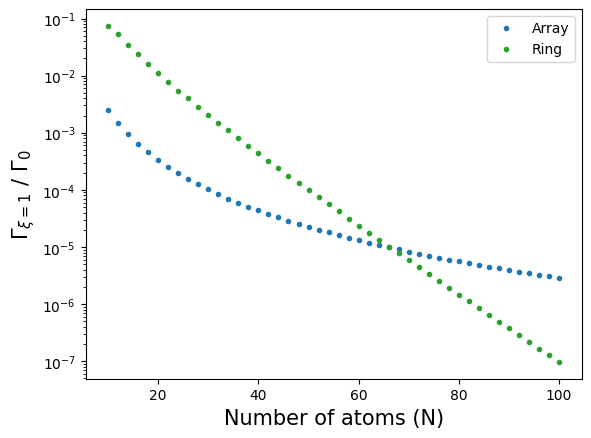

In [29]:
ring_subradiant_decayrates_n_reversed = [-p for p in ring_subradiant_decayrates_n]
chain_subradiant_decayrates_n_reversed = [-p for p in chain_subradiant_decayrates_n]

# def ExpFit(x, A, k):
#     return A * k**(-x)
# par, cov = curve_fit(ExpFit, N_ring, ring_subradiant_decayrates_n_reversed, p0 = [1, 1])
# print('A = ', par[0], 'k = ', par[1])


plt.plot(N_chain, chain_subradiant_decayrates_n_reversed, '.', label = 'Array')
plt.plot(N_ring, ring_subradiant_decayrates_n_reversed, '.', color = '#2ca02c', label = 'Ring')
#plt.plot(N_chain, ExpFit(N_chain, *par), '-', label = r'Fit $0.38 \cdot 1.25^{-N}$')
plt.yscale('log')

plt.xlabel('Number of atoms (N)', size=15)
plt.ylabel(r'$\Gamma_{\xi=1} \ / \ \Gamma_0$', size = 15)
plt.legend()

$y = b a^{-x} \to log(y) = log(b) - x log (a)$ 

In the case of only the linear chain we had $y = bx^a \to log(y) = log(b) + alog(x)$

Which is why when we took the log on both axis we got a linear plot. In the plot above we only take the log on the y-axis which is why when we see a straight line this means we have the relation $y = b a^{-x}$. So exponential suppression in N. 

## Excitation profile

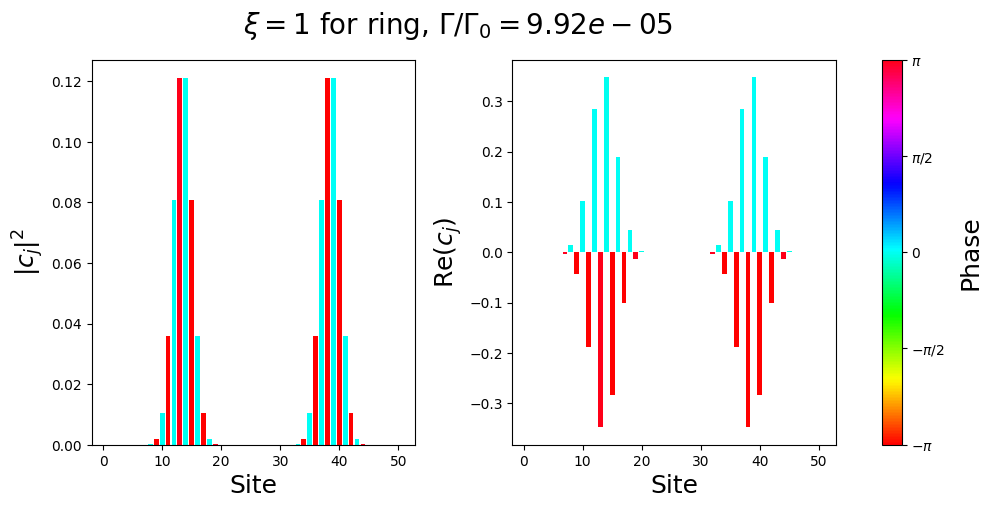

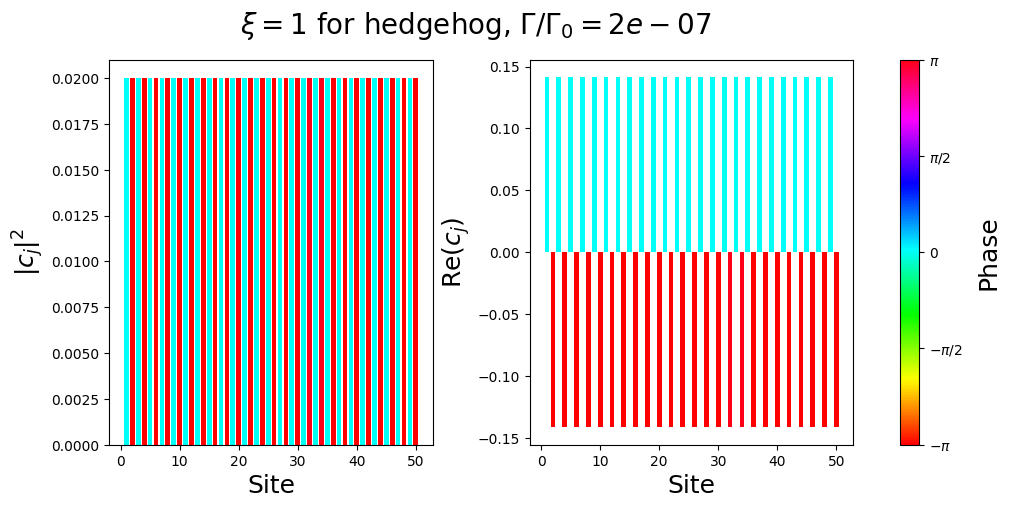

In [30]:
ring_50 = Qchains.RingGenerater(50)
dipole_vector_hat_50 = np.array([1, 0, 0]) #in x direction 
d_50 = 0.3

ring_eig_vals_50, ring_eig_vec_50 = Qchains.FindEigenstates(ring_50, dipole_vector_hat_50, d_50)
Qchains.SiteProbAndAmplitudeDistribution(ring_eig_vals_50, ring_eig_vec_50, 0, titleprecision=7, sharey=False, is_ring=True)

hedgehog_50 = Qchains.RingGenerater(50)
magnitudes = np.linalg.norm(hedgehog_50, axis=1, keepdims=True) 
unit_polarization = hedgehog_50 / magnitudes
hedgehog_eig_vals_50, hedgehog_eig_vec_50 = Qchains.EigenstatesHedgehog(hedgehog_50, unit_polarization, d_50)
Qchains.SiteProbAndAmplitudeDistribution(hedgehog_eig_vals_50, hedgehog_eig_vec_50, 0 , titleprecision=7, sharey=False, is_hedgehog=True)

### Vary d for ring N = 50, polarized in $\hat y$

(0.0, 3.0)

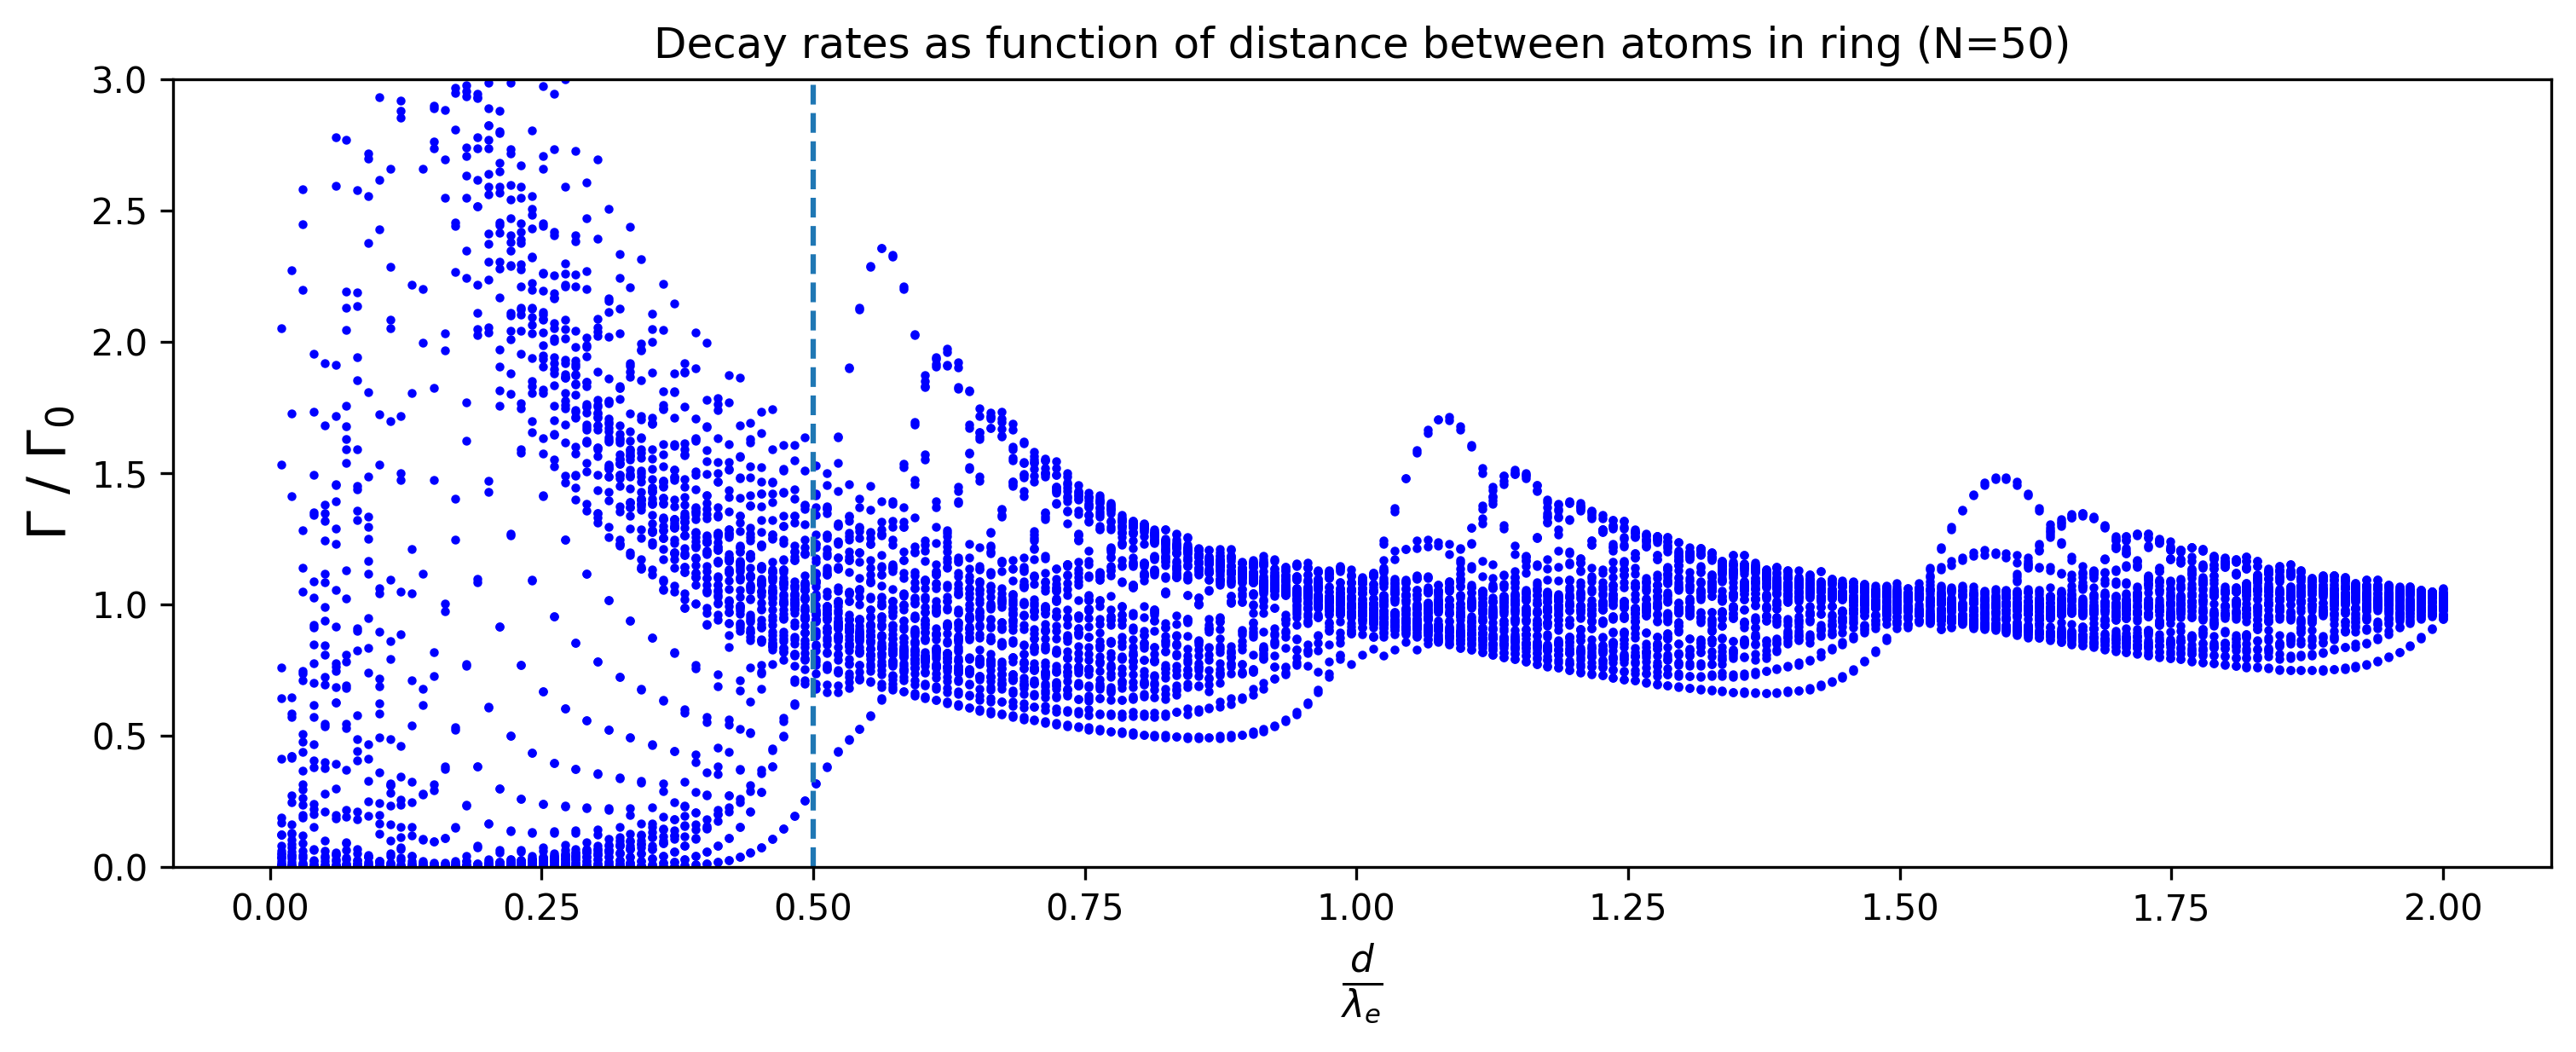

In [ ]:
dipole_vector_hatx = np.array([0, 1, 0]) #in y direction
ring_50 = Qchains.RingGenerater(50)
ring_decay_rate_list_50 = []

distances = np.linspace(0, 2, 200) 

for d in distances[1:]:
    ring_eig_vals_50, ring_eig_vec_50 = Qchains.FindEigenstates(ring_50, dipole_vector_hatx, d)
    ring_decay_rate_50 = 2 * ring_eig_vals_50.real
    ring_decay_rate_list_50.append(ring_decay_rate_50)

    

ring_decay_rate_list_50_reversed = [-p for p in ring_decay_rate_list_50]
plt.figure(figsize=(12,4), dpi=300)
plt.plot(distances[1:], ring_decay_rate_list_50_reversed, '.', c = 'blue', markersize=3); #skal gange med pi for x-akse korrekt her. 
plt.xlabel(r'$\frac{d}{\lambda_e}$', size = 15)
plt.ylabel(r'$\Gamma$ / $\Gamma_0$', size = 15)
plt.axvline(x = 1/2, ymin = 0, ymax=3, linestyle = '--')
plt.title('Decay rates as function of distance between atoms in ring (N=50)')

plt.ylim(-0, 3)

Notice sub radiant states does not occur at the same cut of $\frac{\lambda_e}{2}$. We have to move the atoms even closer. However we get some more superradiant states compared to the array - even for distances greater that $\frac{\lambda_e}{2}$. 
<br> Ligner samtidig, at der er noget periodisk struktur. 

### Compare for small structure (N=5)

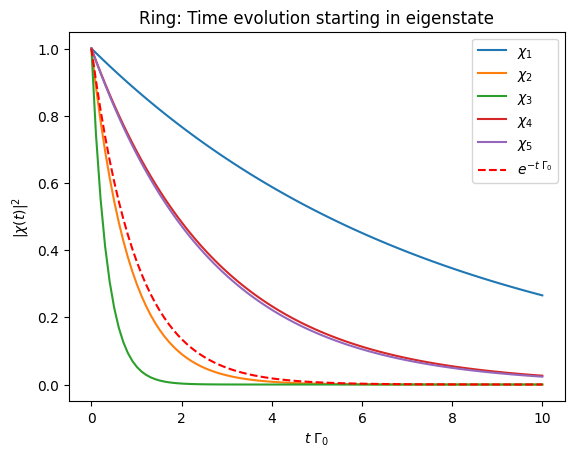

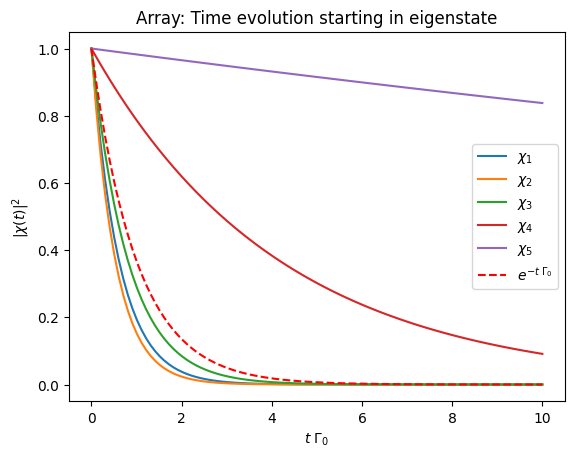

In [32]:
dipole_vector_hat = np.array([0, 1, 0]) #i y retning 
d_5 = 0.25
time = np.linspace(0, 10, 100)

ring_5 = Qchains.RingGenerater(5)
ring_eig_vals_5, ring_eig_vec_5 = Qchains.FindEigenstates(ring_5, dipole_vector_hat, d_5)

array_5 = Qchains.ArrayGenerator(5)
array_eig_vals_5, array_eig_vec_5 = Qchains.FindEigenstates(array_5, dipole_vector_hat, d_5)

Qchains.PlotEigenstateEvolution(ring_eig_vals_5, ring_eig_vec_5, time, title = 'Ring: Time evolution starting in eigenstate', legend = True)
Qchains.PlotEigenstateEvolution(array_eig_vals_5, array_eig_vec_5, time, title = 'Array: Time evolution starting in eigenstate', legend=True)

Seems like there are more subradiant states for the ring, but less sub-radiant than the most subradiant state for the array. However from the plot of most sub-radiant state as function of N, we know that the ring will have the most subradiant states when it gets large enough (a little above 60). Note for even smaller N values for z-polarized ring